In [1]:
#Preparation
import numpy as np
import matplotlib.pyplot as plt

In [40]:
class plot_diagram():
    #Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X),Y) for w.data in self.parameter_values]
        w.data = start
     
    #Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y , 'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration" + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
        
    #Destructor
    def __del__(self):
        plt.close("all")

In [3]:
#Make some data

In [4]:
import torch

In [8]:
#create the f(x) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
print(X)
f = -3 * X

tensor([[-3.0000],
        [-2.9000],
        [-2.8000],
        [-2.7000],
        [-2.6000],
        [-2.5000],
        [-2.4000],
        [-2.3000],
        [-2.2000],
        [-2.1000],
        [-2.0000],
        [-1.9000],
        [-1.8000],
        [-1.7000],
        [-1.6000],
        [-1.5000],
        [-1.4000],
        [-1.3000],
        [-1.2000],
        [-1.1000],
        [-1.0000],
        [-0.9000],
        [-0.8000],
        [-0.7000],
        [-0.6000],
        [-0.5000],
        [-0.4000],
        [-0.3000],
        [-0.2000],
        [-0.1000],
        [ 0.0000],
        [ 0.1000],
        [ 0.2000],
        [ 0.3000],
        [ 0.4000],
        [ 0.5000],
        [ 0.6000],
        [ 0.7000],
        [ 0.8000],
        [ 0.9000],
        [ 1.0000],
        [ 1.1000],
        [ 1.2000],
        [ 1.3000],
        [ 1.4000],
        [ 1.5000],
        [ 1.6000],
        [ 1.7000],
        [ 1.8000],
        [ 1.9000],
        [ 2.0000],
        [ 2.1000],
        [ 2.

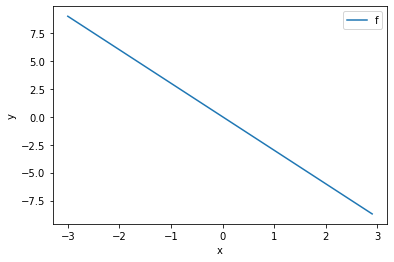

In [9]:
#Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
#Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

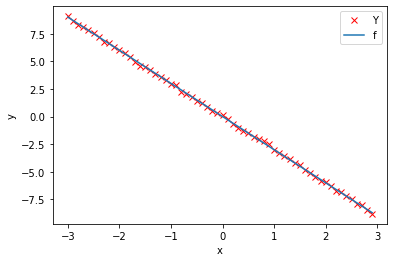

In [15]:
#Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [17]:
#Create the Model and Cost Function

In [41]:
#Create forward function for prediction

def forward(x):
    return w * x

In [42]:
#Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [43]:
#Create Learning rate and empty list to record the loss for each iteration
lr = 0.1
Loss = []

In [44]:
#Create a model parameter
w = torch.tensor(-10.0, requires_grad = True)

In [45]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [46]:
#Train the Model

In [47]:
#Define a function for train the model

def train_model(iter):
    for epoch in range(iter):
        
        #Make the prediction
        Yhat = forward(X)
        
        #Calculate the iteration
        loss = criterion(Yhat, Y)
        
        #plot the diagram
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        #store the loss into list
        Loss.append(loss.item())
        
        #Backward pass: compute gradient of the losswith respect to all the learnable parameters
        loss.backward()
        
        #Update parameters
        w.data = w.data - lr * w.grad.data
        
        #Zero the gradients before running the backward pass
        w.grad.data.zero_()

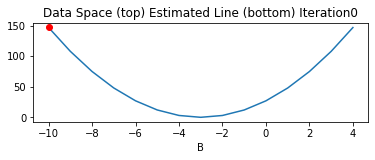

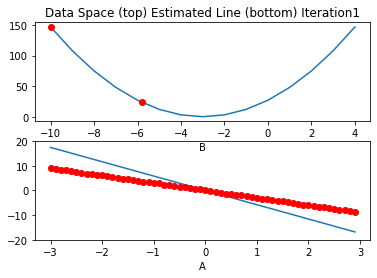

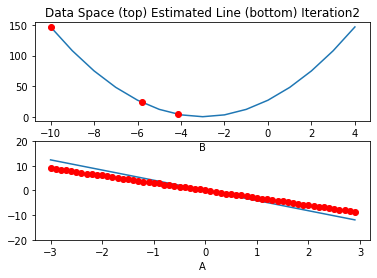

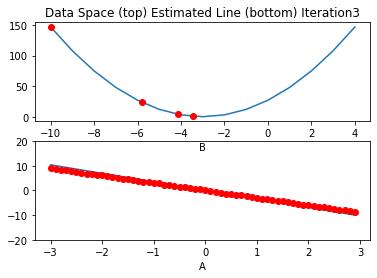

<Figure size 432x288 with 0 Axes>

In [48]:
train_model(4)

Text(23.875, 0.5, 'Cost')

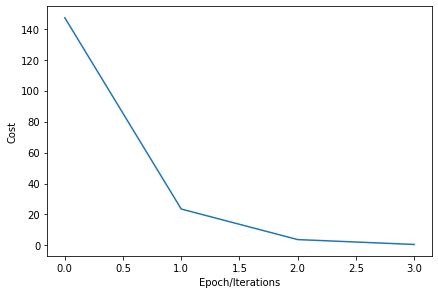

In [49]:
#plot the loss for each iteration

plt.plot(Loss)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [50]:
# Practice: Create w with the inital value of -15.0

w = torch.tensor(-15.0, requires_grad = True)

In [51]:
# Practice: Create LOSS2 list

LOSS2 = []

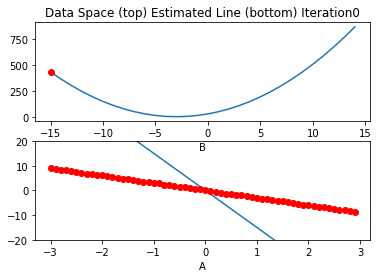

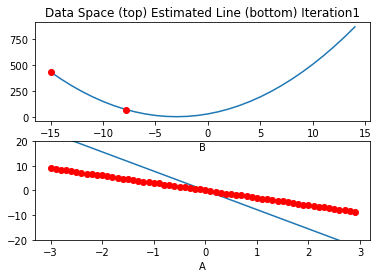

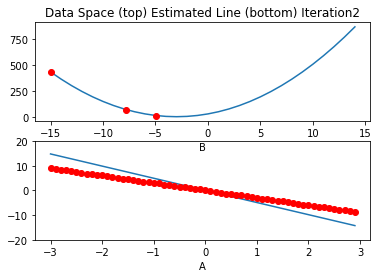

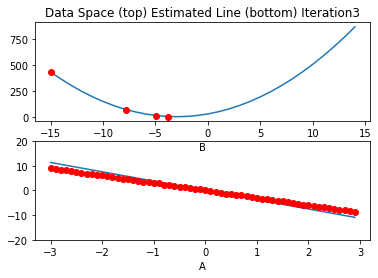

<Figure size 432x288 with 0 Axes>

In [54]:
# Practice: Create your own my_train_model

gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

def my_train_model(iter):
    for epoch in range(iter):
    
        #Make the prediction
        Yhat = forward(X)

        #Check the loss
        loss = criterion(Yhat, Y)

        #Plot the diagram
        gradient_plot1(Yhat, w, loss.item(), epoch)

        #Store the loss into list
        LOSS2.append(loss.item())

        #Bacward pass
        loss.backward()

        #Update parameters
        w.data = w.data - lr * w.grad.data

        #Zero the gradients before running the backward pass
        w.grad.data.zero_()
        
my_train_model(4)

In [ ]:
# Practice: Plot the list LOSS2 and LOSS

plt.plot(Loss, label = 'Loss')
plt.plot(LOSS2, label = 'Loss2')